In the Lotka-Volterra Predator-Prey model, the populations cycle forever rather than settling down. The Lotka-Volterra model describes the dynamics of two interacting species: a prey ($x$) and a predator ($y$).
$$\begin{cases} \dot{x} = ax - bxy \\ \dot{y} = -cy + dxy \end{cases}$$
- $x$: Number of prey (e.g., rabbits).
- $y$: Number of predators (e.g., wolves).
- $a$: **Prey growth rate**; represents the intrinsic birth rate minus natural death.
- $b$: **Predation efficiency**; how effectively a predator reduces the prey population.
- $c$: **Predator mortality rate**; the rate at which predators die without food.
- $d$: **Conversion efficiency**; how many new predators are "born" per prey consumed.

- **Infinite Prey Resources:** In the absence of predators ($y=0$), the prey population grows exponentially ($\dot{x} = ax$).
- **Specialist Predators:** In the absence of prey ($x=0$), the predator population dies out at an exponential rate ($\dot{y} = -cy$).
- **Mass-Action Interaction:** The "killing rate" or interaction frequency is proportional to the product of both populations ($xy$), assuming random encounters.
- **Constant Environment:** Parameters $a, b, c, d$ are positive constants representing fixed birth/death rates and interaction efficiencies.

To understand the system's long-term behavior, we find the **Steady States** where the rates of change are zero ($\dot{x}=0$ and $\dot{y}=0$).

 **Step 1: Solving $\dot{x} = 0$**
$$ax - bxy = 0 \Rightarrow x(a - by) = 0$$
This provides two possibilities:

1. $x = 0$
2. $y = \frac{a}{b}$

**Step 2: Solving $\dot{y} = 0$**
$$-cy + dxy = 0 \Rightarrow y(-c + dx) = 0$$
This provides two possibilities:

1. $y = 0$
2. $x = \frac{c}{d}$

**The Resulting Fixed Points**:

- **Trivial Steady State $(0,0)$:** The "Empty Forest" where both species are extinct.
- **Coexistence Steady State $(\frac{c}{d}, \frac{a}{b})$:** The point where both populations are perfectly balanced.

The relationship between $x$ and $y$ forms a **Negative Feedback Loop**.

- As prey ($x$) increases, it provides more food, causing predators ($y$) to increase.
- As predators increase, they consume more prey, causing the prey population to decline.
- The decline in food eventually causes the predator population to crash, allowing the prey to recover, restarting the cycle.

We use **Linearization** via the **Jacobian Matrix** ($J$) to determine the stability of these points.
$$J(x,y) = \begin{bmatrix} \frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} \\ \frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} \end{bmatrix} = \begin{bmatrix} a-by & -bx \\ dy & -c+dx \end{bmatrix}$$
Evaluating $J$ at $(0,0)$:
$$J(0,0) = \begin{bmatrix} a & 0 \\ 0 & -c \end{bmatrix}$$
The eigenvalues are $\lambda_1 = a$ and $\lambda_2 = -c$. Since one is positive and one is negative, this is a **Saddle Point**. The system is unstable here; if even one rabbit is introduced, the population will move away from extinction.

Evaluating $J$ at the coexistence point:
$$J(\frac{c}{d}, \frac{a}{b}) = \begin{bmatrix} 0 & -\frac{bc}{d} \\ \frac{ad}{b} & 0 \end{bmatrix}$$
To find the eigenvalues ($\lambda$), we solve the characteristic equation $det(J - \lambda I) = 0$:
$$\lambda^2 + ca = 0 \Rightarrow \lambda = \pm i\sqrt{ca}$$
Because the eigenvalues are purely **imaginary**, the system does not settle at the point but instead results in **Periodic Oscillations**. This is known as an **Orbital Steady State**.

Trivial Steady State: (0, 0)
Coexistence Steady State: (25.0, 10.0)


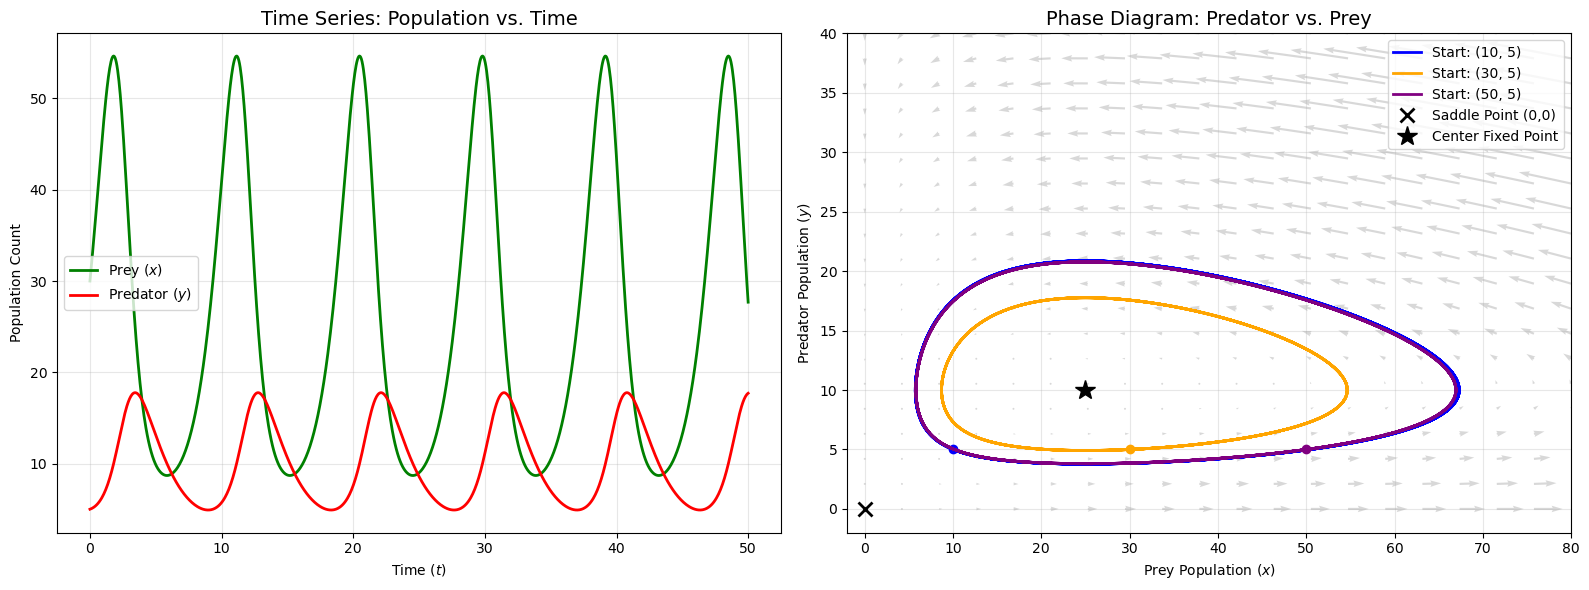

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. System Definition ---
def lotka_volterra(state, t, a, b, c, d):
    """
    Defines the differential equations for the Lotka-Volterra model.
    x = Prey, y = Predator
    """
    x, y = state
    
    # The governing equations from the text
    dxdt = a * x - b * x * y
    dydt = -c * y + d * x * y
    
    return [dxdt, dydt]

# --- 2. Parameters ---
# We choose values to make the cycles clear and easy to read.
a = 1.0   # Prey growth rate
b = 0.1   # Predation efficiency
c = 0.5   # Predator mortality rate
d = 0.02  # Conversion efficiency

# Calculate Fixed Points (Steady States) based on your formulas
# Trivial State (0,0)
fixed_point_trivial = (0, 0)
# Coexistence State (c/d, a/b)
fixed_point_coexist = (c / d, a / b)

print(f"Trivial Steady State: {fixed_point_trivial}")
print(f"Coexistence Steady State: {fixed_point_coexist}")

# --- 3. Simulation Setup ---
# Time steps for the integration
t = np.linspace(0, 50, 1000)

# Define different starting populations (Initial Conditions)
# Each tuple is (Starting Prey, Starting Predators)
initial_conditions = [
    (10, 5),    # Small orbit
    (30, 5),    # Medium orbit
    (50, 5)     # Large orbit
]

# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- PLOT 1: Time Series (Oscillations) ---
# We use the 'Medium orbit' (30, 5) for the time series example
x0_example = initial_conditions[1]
sol = odeint(lotka_volterra, x0_example, t, args=(a, b, c, d))
prey_pop = sol[:, 0]
pred_pop = sol[:, 1]

ax1.plot(t, prey_pop, 'g-', label='Prey ($x$)', linewidth=2)
ax1.plot(t, pred_pop, 'r-', label='Predator ($y$)', linewidth=2)
ax1.set_title("Time Series: Population vs. Time", fontsize=14)
ax1.set_xlabel("Time ($t$)")
ax1.set_ylabel("Population Count")
ax1.grid(True, alpha=0.3)
ax1.legend()

# --- PLOT 2: Phase Diagram (State Space) ---
# A. Generate the Vector Field (Slope Vectors)
x_max = 80
y_max = 40
x_grid = np.linspace(0, x_max, 20)
y_grid = np.linspace(0, y_max, 20)
X, Y = np.meshgrid(x_grid, y_grid)

# Calculate growth rates at every grid point
U = a * X - b * X * Y
V = -c * Y + d * X * Y

# Plot the "Slope Vectors" (Direction of change)
ax2.quiver(X, Y, U, V, alpha=0.3, color='gray')

# B. Plot Trajectories (The Cycles)
colors = ['blue', 'orange', 'purple']
for i, x0 in enumerate(initial_conditions):
    sol = odeint(lotka_volterra, x0, t, args=(a, b, c, d))
    ax2.plot(sol[:, 0], sol[:, 1], color=colors[i], linewidth=2, label=f'Start: {x0}')
    # Mark the start of the path
    ax2.plot(x0[0], x0[1], 'o', color=colors[i])

# C. Mark the Steady States
# Saddle Point at (0,0)
ax2.plot(0, 0, 'kx', markersize=10, markeredgewidth=2, label='Saddle Point (0,0)')
# Center Point (Orbital Center)
ax2.plot(fixed_point_coexist[0], fixed_point_coexist[1], 'k*', markersize=15, label='Center Fixed Point')

ax2.set_title("Phase Diagram: Predator vs. Prey", fontsize=14)
ax2.set_xlabel("Prey Population ($x$)")
ax2.set_ylabel("Predator Population ($y$)")
ax2.set_xlim(-2, x_max)
ax2.set_ylim(-2, y_max)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

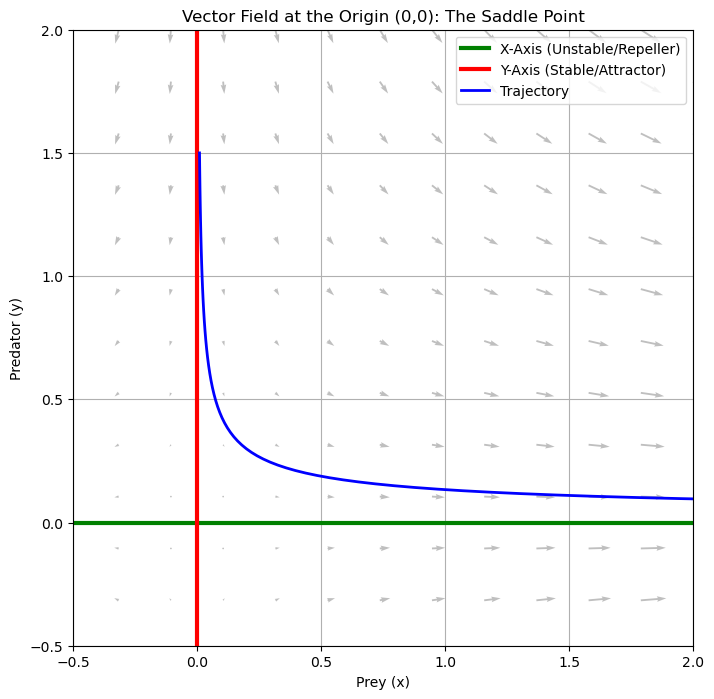

In [2]:
# Parameters
a = 1.0   # Prey growth
b = 0.1
c = 0.5   # Predator death
d = 0.02

# Grid centered around (0,0) including negative space to see the 'Saddle' shape
# Note: Negative populations don't exist in biology, but are needed to see the full math geometry.
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_range, y_range)

# Vector Field Equations
U = a * X - b * X * Y
V = -c * Y + d * X * Y

# Plotting
plt.figure(figsize=(8, 8))
plt.title("Vector Field at the Origin (0,0): The Saddle Point")

# 1. The Vector Field (Quiver)
plt.quiver(X, Y, U, V, color='gray', alpha=0.5)

# 2. The Axes "Highways"
plt.axhline(0, color='green', linewidth=3, label='X-Axis (Unstable/Repeller)') # Prey axis
plt.axvline(0, color='red', linewidth=3, label='Y-Axis (Stable/Attractor)')   # Predator axis

# 3. Sample Trajectory starting near Y-axis
from scipy.integrate import odeint
def model(z, t):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

t = np.linspace(0, 10, 100)
# Start with many predators, very few prey
sol = odeint(model, [0.01, 1.5], t) 
plt.plot(sol[:,0], sol[:,1], 'b-', linewidth=2, label='Trajectory')

plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.xlabel("Prey (x)")
plt.ylabel("Predator (y)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()